# Kriging and Simulation 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from statistics import stdev
import statistics
from statsmodels.graphics.gofplots import qqplot_2samples
import statsmodels.api as sm

### Exploratory Data Analysis

In [3]:
df = pd.read_csv('C:/Users/donto/Downloads/poro_data/poro.txt', delimiter = '\t')
df

,% Easting(km),Northing(km),Porosity (%)
0,0.51,11.94,14.0
1,0.10,8.90,14.7
2,0.52,4.91,14.5
3,0.93,5.11,14.4
4,0.89,3.71,13.8
...,...,...,...
79,14.54,13.34,14.5
80,12.90,10.38,15.0
81,14.09,10.13,15.7
82,15.29,9.35,16.5


In [4]:
easting = np.asarray(df['% Easting(km)'])
northing = np.asarray(df['Northing(km)'])
poro = np.asarray(df['Porosity (%)'])
print('Easting: \n', easting)
print('\nNorthing: \n', northing)
print('\nPorosity: \n', poro)

Easting: 
 [ 0.51  0.1   0.52  0.93  0.89  1.55  2.91  2.78  2.74  2.29  1.7   1.91
  2.69  3.59  4.04  5.49  4.67  3.97  3.48  3.72  3.69  4.47  3.61  5.05
  6.37  6.57  6.25  7.35  7.19  5.2   4.87  7.46  7.1   7.43  7.31  9.17
  7.92  8.13  8.5   8.29  8.49  9.89  9.89  9.15 10.01 11.12 13.39 11.99
 12.94  9.44  9.53  8.87  9.65 10.77 10.72 10.97 11.3  11.55 12.2  12.5
 13.16 13.81 15.05 15.3  16.25 18.63 19.04 17.97 16.9  17.1  18.09 19.28
 19.49 16.76 18.33 17.55 16.97 16.31 14.71 14.54 12.9  14.09 15.29 14.92]

Northing: 
 [11.94  8.9   4.91  5.11  3.71  0.87  0.79  2.15  4.41  5.73 11.74 12.19
 12.77 14.08 14.54 10.91  9.8   8.57  7.54  6.88  5.07  2.31  0.59  1.94
  2.31  0.95  0.07  1.24  1.98  8.57  9.14 12.85  8.98  8.86  6.96  1.2
  6.72  8.69 10.09 10.83 11.41 12.89 13.71 13.71 15.6  15.32 15.73 12.89
 12.85  9.14  7.    6.26  5.81  4.16  5.07  5.73  7.09  4.9   8.24  3.05
  1.36  3.67  2.76  3.13  0.99  1.49  1.73  3.09  4.99  6.1   7.08  7.08
  9.76 15.77 13.5  11.12 13.

#### Constructing a Scattergram of the data

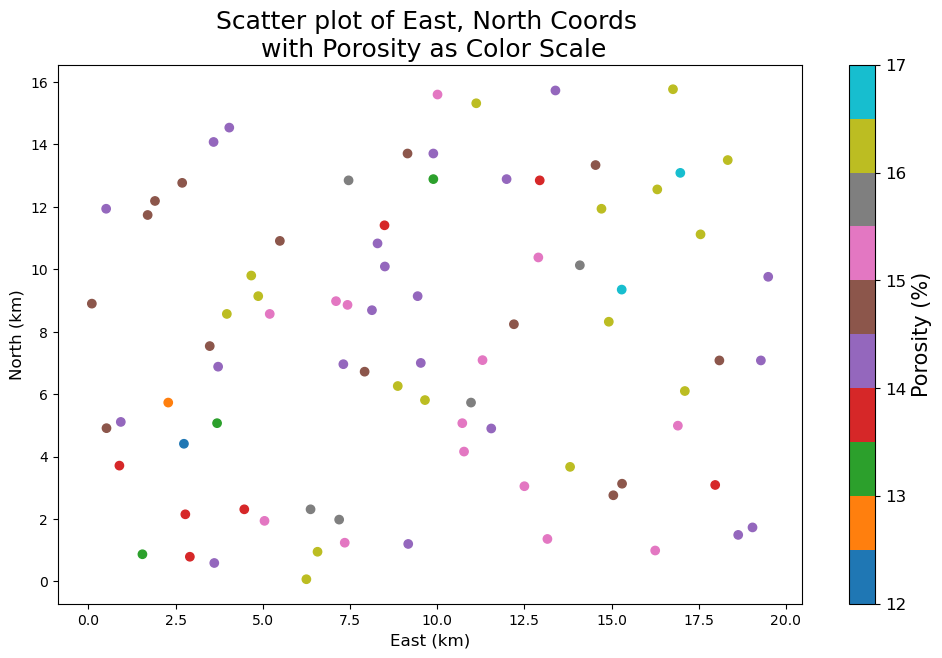

In [5]:
fig, ax = plt.subplots(figsize = (12, 7))
im = ax.scatter(easting, northing, c = poro, cmap = 'tab10')
ax.set_xlabel('East (km)', fontsize = 12)
ax.set_ylabel('North (km)', fontsize = 12)
ax.set_title('Scatter plot of East, North Coords \n with Porosity as Color Scale', fontsize = 18)
cb = fig.colorbar(im, ax = ax)
cb.set_label(label = 'Porosity (%)', fontsize = 15)
cb.ax.tick_params(labelsize = 12)
plt.show()

In [6]:
poro_unique = np.unique(poro)
poro_unique_count = np.size(poro_unique)
poro_size = np.size(poro)
poro_sort = np.sort(poro)
poro_unique_sort = np.sort(poro_unique)

print('Poro: \n', poro)
print('\nPoro sorted: \n', poro_sort)
print('\nUnique poro: \n', poro_unique)
print('\nUnique poro sorted: \n', poro_unique_sort)
print('\nCount of poro is', poro_size)
print('\nCount of unique poro is', poro_unique_count)

Poro: 
 [14.  14.7 14.5 14.4 13.8 13.  13.9 13.7 12.  12.6 14.5 14.5 14.5 14.
 14.2 14.5 16.3 16.  14.5 14.  13.  13.5 14.  15.  15.5 16.  16.  15.
 15.5 15.  16.  15.5 15.  15.  14.  14.  14.5 14.  14.  14.  13.5 13.3
 14.  14.5 15.  16.  14.  14.  13.5 14.2 14.  16.  16.  15.3 15.  15.5
 15.  14.  14.5 15.  15.  16.  14.5 14.5 15.  14.  14.  13.5 15.  16.
 14.8 14.2 14.  16.  16.  16.  17.  16.  16.  14.5 15.  15.7 16.5 16. ]

Poro sorted: 
 [12.  12.6 13.  13.  13.3 13.5 13.5 13.5 13.5 13.7 13.8 13.9 14.  14.
 14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.
 14.  14.2 14.2 14.2 14.4 14.5 14.5 14.5 14.5 14.5 14.5 14.5 14.5 14.5
 14.5 14.5 14.5 14.7 14.8 15.  15.  15.  15.  15.  15.  15.  15.  15.
 15.  15.  15.  15.  15.3 15.5 15.5 15.5 15.5 15.7 16.  16.  16.  16.
 16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.3 16.5 17. ]

Unique poro: 
 [12.  12.6 13.  13.3 13.5 13.7 13.8 13.9 14.  14.2 14.4 14.5 14.7 14.8
 15.  15.3 15.5 15.7 16.  16.3 16.5 17. ]


In [7]:
poro_min = np.min(poro)
poro_max = np.max(poro)
poro_mean = np.mean(poro)
poro_std = np.std(poro, ddof = 1)
poro_var = np.var(poro, ddof = 1)

print('Min poro:', poro_min)
print('Max poro:', poro_max)
print('Mean poro:', np.round(poro_mean, 4))
print('Std poro:', np.round(poro_std, 4))
print('Var poro:', np.round(poro_var, 4))

Min poro: 12.0
Max poro: 17.0
Mean poro: 14.7095
Std poro: 0.9746
Var poro: 0.9498


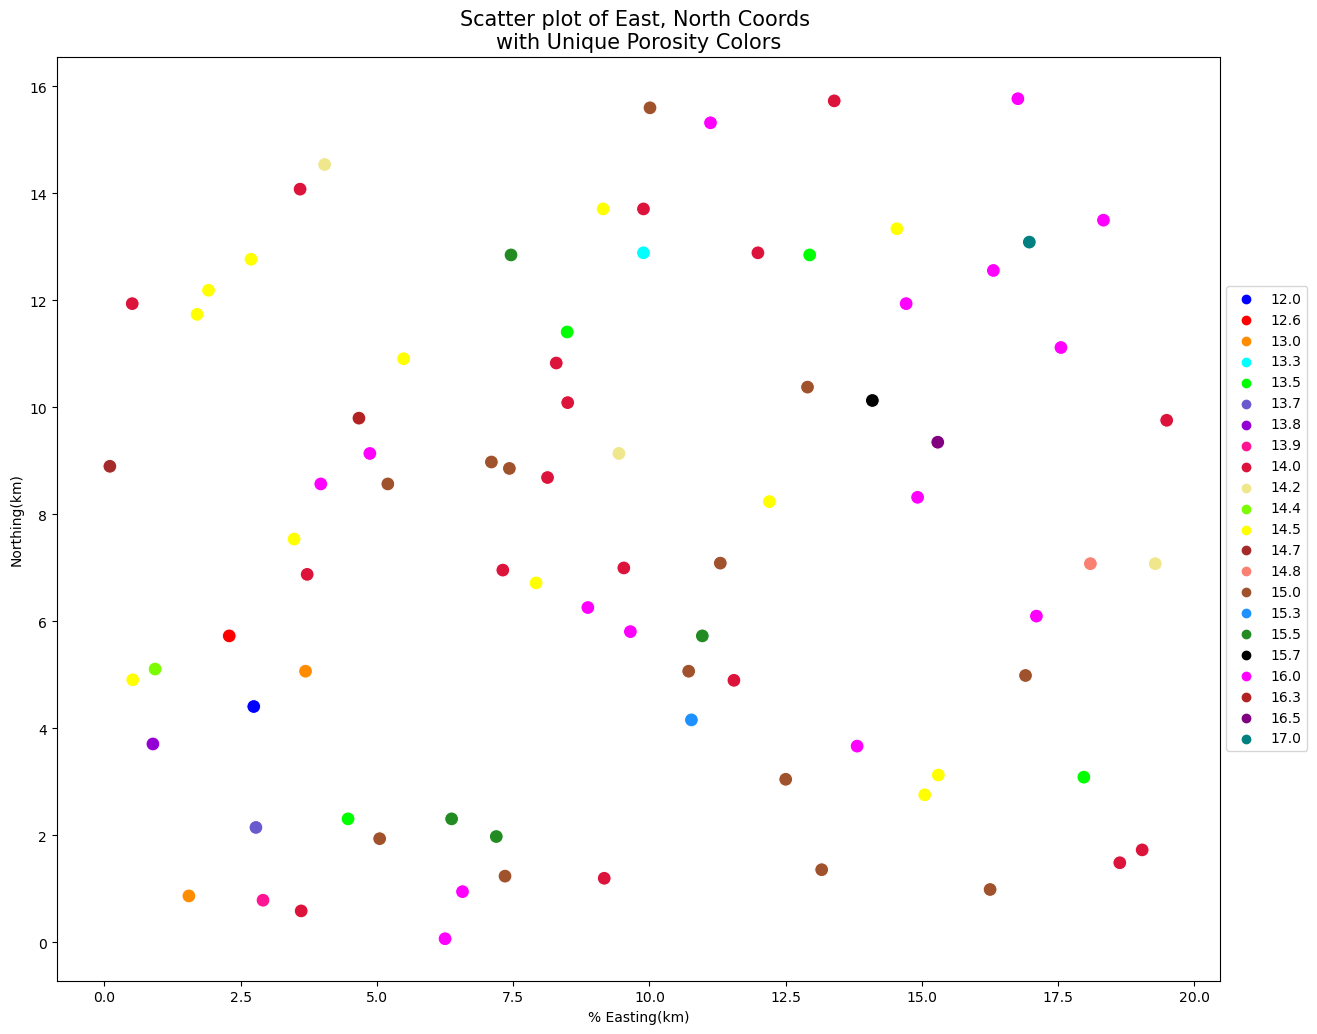

In [8]:
color_dict = dict({12:'blue',
                   12.6:'red',
                   13:'darkorange',
                   13.3:'cyan',
                   13.5:'lime',
                   13.7:'slateblue',
                   13.8:'darkviolet',
                   13.9:'deeppink',
                   14:'crimson',
                   14.2:'khaki',
                   14.4:'lawngreen',                   
                   14.5:'yellow',
                   14.7:'brown',
                   14.8:'salmon',
                   15:'sienna',
                   15.3:'dodgerblue',
                   15.5:'forestgreen',
                   15.7:'black',
                   16:'fuchsia',
                   16.3:'firebrick',
                   16.5:'purple',
                   17:'teal'})

plt.figure(figsize = (15, 12))
g = sns.scatterplot(x = '% Easting(km)', y = 'Northing(km)', hue = 'Porosity (%)',
               data = df, palette = color_dict, legend = 'full', s = 100)
g.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.title('Scatter plot of East, North Coords \nwith Unique Porosity Colors', fontsize = 15)
plt.show()

# Kringing (simple/ordinary)
#### Constructing omni-directional variogram

In [9]:
#Converting Data into matrices
x = np.asmatrix(easting).T
y = np.asmatrix(northing).T
poro = np.asmatrix(poro).T
print('Easting: \n', x)
print('\nNorthing: \n', y)
print('\nPorosity: \n', poro)

Easting: 
 [[ 0.51]
 [ 0.1 ]
 [ 0.52]
 [ 0.93]
 [ 0.89]
 [ 1.55]
 [ 2.91]
 [ 2.78]
 [ 2.74]
 [ 2.29]
 [ 1.7 ]
 [ 1.91]
 [ 2.69]
 [ 3.59]
 [ 4.04]
 [ 5.49]
 [ 4.67]
 [ 3.97]
 [ 3.48]
 [ 3.72]
 [ 3.69]
 [ 4.47]
 [ 3.61]
 [ 5.05]
 [ 6.37]
 [ 6.57]
 [ 6.25]
 [ 7.35]
 [ 7.19]
 [ 5.2 ]
 [ 4.87]
 [ 7.46]
 [ 7.1 ]
 [ 7.43]
 [ 7.31]
 [ 9.17]
 [ 7.92]
 [ 8.13]
 [ 8.5 ]
 [ 8.29]
 [ 8.49]
 [ 9.89]
 [ 9.89]
 [ 9.15]
 [10.01]
 [11.12]
 [13.39]
 [11.99]
 [12.94]
 [ 9.44]
 [ 9.53]
 [ 8.87]
 [ 9.65]
 [10.77]
 [10.72]
 [10.97]
 [11.3 ]
 [11.55]
 [12.2 ]
 [12.5 ]
 [13.16]
 [13.81]
 [15.05]
 [15.3 ]
 [16.25]
 [18.63]
 [19.04]
 [17.97]
 [16.9 ]
 [17.1 ]
 [18.09]
 [19.28]
 [19.49]
 [16.76]
 [18.33]
 [17.55]
 [16.97]
 [16.31]
 [14.71]
 [14.54]
 [12.9 ]
 [14.09]
 [15.29]
 [14.92]]

Northing: 
 [[11.94]
 [ 8.9 ]
 [ 4.91]
 [ 5.11]
 [ 3.71]
 [ 0.87]
 [ 0.79]
 [ 2.15]
 [ 4.41]
 [ 5.73]
 [11.74]
 [12.19]
 [12.77]
 [14.08]
 [14.54]
 [10.91]
 [ 9.8 ]
 [ 8.57]
 [ 7.54]
 [ 6.88]
 [ 5.07]
 [ 2.31]
 [ 0.59]
 [ 1.94]
 [ 

In [10]:
n_points = x.shape[0]
ones_vec = np.asmatrix(np.ones(n_points))
ones_vec.shape

(1, 84)

In [11]:
x_mat = x*ones_vec
y_mat = y*ones_vec
poro_mat = poro*ones_vec
print('Easting matrix: \n', x_mat)
print('\nNorthing matrix: \n', y_mat)
print('\nPorosity matrix: \n', poro_mat)

Easting matrix: 
 [[ 0.51  0.51  0.51 ...  0.51  0.51  0.51]
 [ 0.1   0.1   0.1  ...  0.1   0.1   0.1 ]
 [ 0.52  0.52  0.52 ...  0.52  0.52  0.52]
 ...
 [14.09 14.09 14.09 ... 14.09 14.09 14.09]
 [15.29 15.29 15.29 ... 15.29 15.29 15.29]
 [14.92 14.92 14.92 ... 14.92 14.92 14.92]]

Northing matrix: 
 [[11.94 11.94 11.94 ... 11.94 11.94 11.94]
 [ 8.9   8.9   8.9  ...  8.9   8.9   8.9 ]
 [ 4.91  4.91  4.91 ...  4.91  4.91  4.91]
 ...
 [10.13 10.13 10.13 ... 10.13 10.13 10.13]
 [ 9.35  9.35  9.35 ...  9.35  9.35  9.35]
 [ 8.32  8.32  8.32 ...  8.32  8.32  8.32]]

Porosity matrix: 
 [[14.  14.  14.  ... 14.  14.  14. ]
 [14.7 14.7 14.7 ... 14.7 14.7 14.7]
 [14.5 14.5 14.5 ... 14.5 14.5 14.5]
 ...
 [15.7 15.7 15.7 ... 15.7 15.7 15.7]
 [16.5 16.5 16.5 ... 16.5 16.5 16.5]
 [16.  16.  16.  ... 16.  16.  16. ]]


In [12]:
# computing distance matrix
dist = np.sqrt(np.power((x_mat - x_mat.T), 2) + np.power((y_mat - y_mat.T), 2))
dist[0:3, 0:3]

matrix([[0.        , 3.06752343, 7.03000711],
        [3.06752343, 0.        , 4.01204437],
        [7.03000711, 4.01204437, 0.        ]])

In [13]:
# square difference of porosity values
square_diff = np.power((poro_mat - poro_mat.T), 2)
square_diff[0:3, 0:3]

matrix([[0.  , 0.49, 0.25],
        [0.49, 0.  , 0.04],
        [0.25, 0.04, 0.  ]])

In [14]:
# Defining the variogram
def dir_var(x, y, poro, lag_size, n_lags, lag_tol, Azimuth, angle_tol, bandwidth):
  """
  Function to calculate the directional variogram of the data
  Parameters
  __________
  x: East coords
  y: North coords
  poro: Porosity data
  lag_size: Size of the lags, how big each lag is
  n_lags: Number of lags
  lag_tol: Lag tolerance, how much difference there is between lag size
  Azimuth: Azimuth angle, direction the directional variogram is rotated in, an Azimuth of 45 degrees is in the North-East direction
  angle_tol: Angle tolerance, how far the angle (against X-axis) between two points can be off the Azimuth to be still considered as a directional pair
  bandwidth: Bandwidth of the angles, maximum coordinate distance a point can have from the azimuth line
  """
    
  n_points = x.shape[0]
  ones_vec = np.asmatrix(np.ones(n_points))
  x_mat = x*ones_vec
  y_mat = y*ones_vec
  poro_mat = poro*ones_vec
  dist = np.sqrt(np.power((x_mat - x_mat.T), 2) + np.power((y_mat - y_mat.T), 2))
  square_diff = np.power((poro_mat - poro_mat.T), 2)
  
  EDVar = np.zeros(n_lags)
  ual = Azimuth + angle_tol #Upper Angle Limit
  lal = Azimuth - angle_tol #Lower Angle Limit

  for l in range(n_lags):
      #Computing lag distances
      lag = l + 1
      ul = lag*lag_size + lag_tol
      ll = lag*lag_size - lag_tol
      index = np.argwhere((dist <= ul) & (dist >= ll))
      nh = index.shape[0]
      EDVar[l] = (1/(2*nh))*np.sum(square_diff[index[:,0], index[:,1]])
      
  return EDVar

In [15]:
lag_size = 1
n_lags = 10
lag_tol = 0.5*lag_size
Azimuth = 0
angle_tol = 0
bandwidth = 0

Expdirvar = dir_var(x, y, poro, lag_size, n_lags, lag_tol, Azimuth, angle_tol, bandwidth)

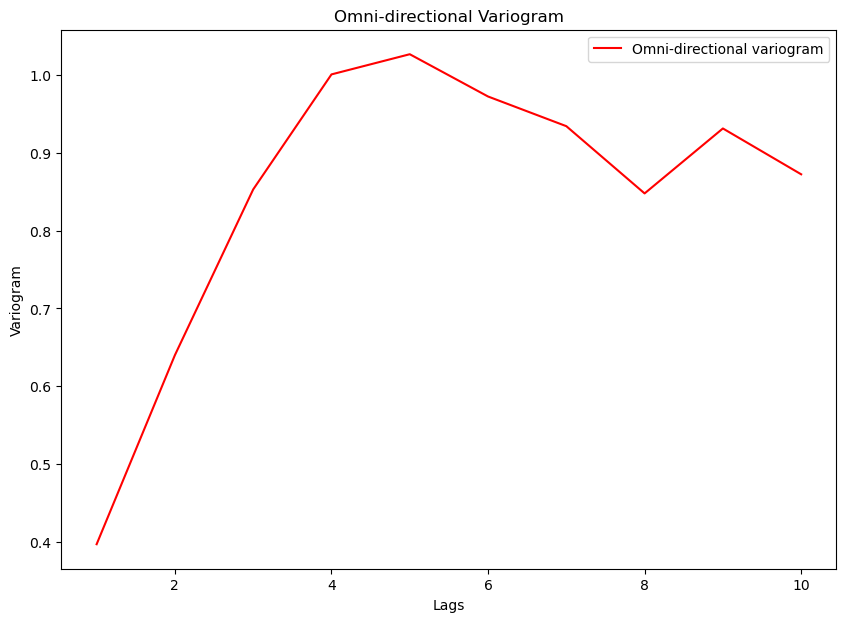

In [16]:
lag_dist = np.arange(lag_size, lag_size*(n_lags + 1), lag_size)
plt.figure(figsize = (10, 7))
plt.plot(lag_dist, Expdirvar, c = 'r', label = 'Omni-directional variogram')
plt.ylabel('Variogram')
plt.xlabel('Lags')
plt.title('Omni-directional Variogram')
plt.legend()
plt.show()

#### Constructing Spherical variogram

In [17]:
def sph_var(h, range_a, sill, nugget):
    """
    Function to calculate the spherical variogram
    Parameters
    __________
    h: lag distance
    range_a: range
    sill: sill
    nugget: nugget
    """
    gamma = nugget + sill*(1.5*(h/range_a) - 0.5*np.power(h/range_a, 3))
    index = np.argwhere(h > range_a)
    if(index.shape[1] > 1):
        gamma[index[:,0], index[:,1]] = nugget + sill
    else:
        gamma[index] = nugget + sill
    return gamma

In [18]:
lag_dim = np.arange(1, n_lags + 1)

params,_ = curve_fit(sph_var, lag_dim, Expdirvar, p0 = [4, 0.91, 0.2])
params

array([4.13707316, 0.85647882, 0.08384989])

In [19]:
range_a = params[0]
sill = params[1]
nugget = params[2]
gamma_h_sph = sph_var(lag_dim, range_a, sill, nugget)
gamma_h_sph

array([0.38833991, 0.65654233, 0.85216954, 0.93893394, 0.94032871,
       0.94032871, 0.94032871, 0.94032871, 0.94032871, 0.94032871])

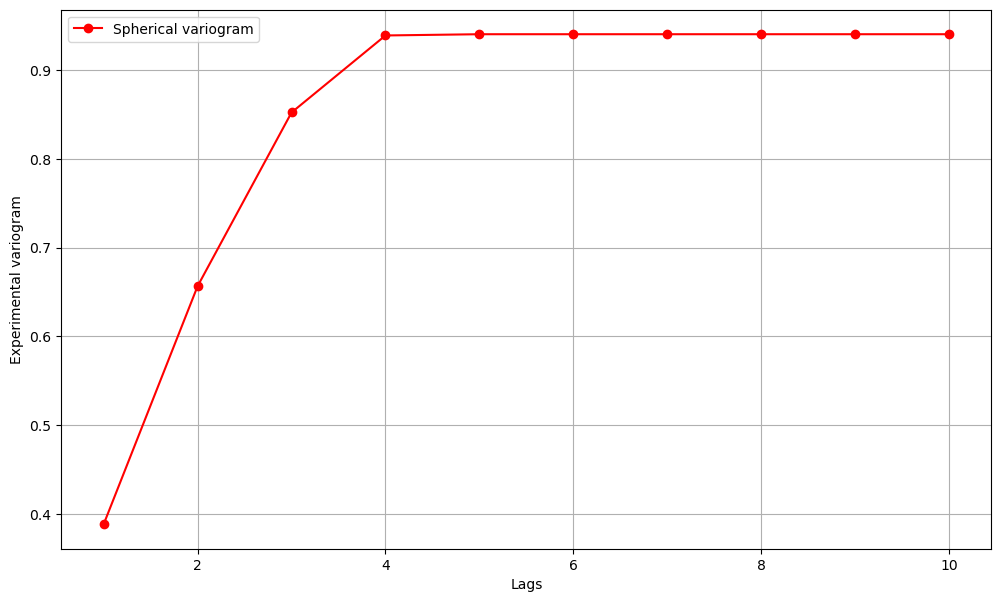

In [20]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(lag_dist, gamma_h_sph, '-o', c = 'r', label = 'Spherical variogram')
ax.grid(True)
ax.set_xlabel('Lags')
ax.set_ylabel('Experimental variogram')
plt.legend()
plt.show()

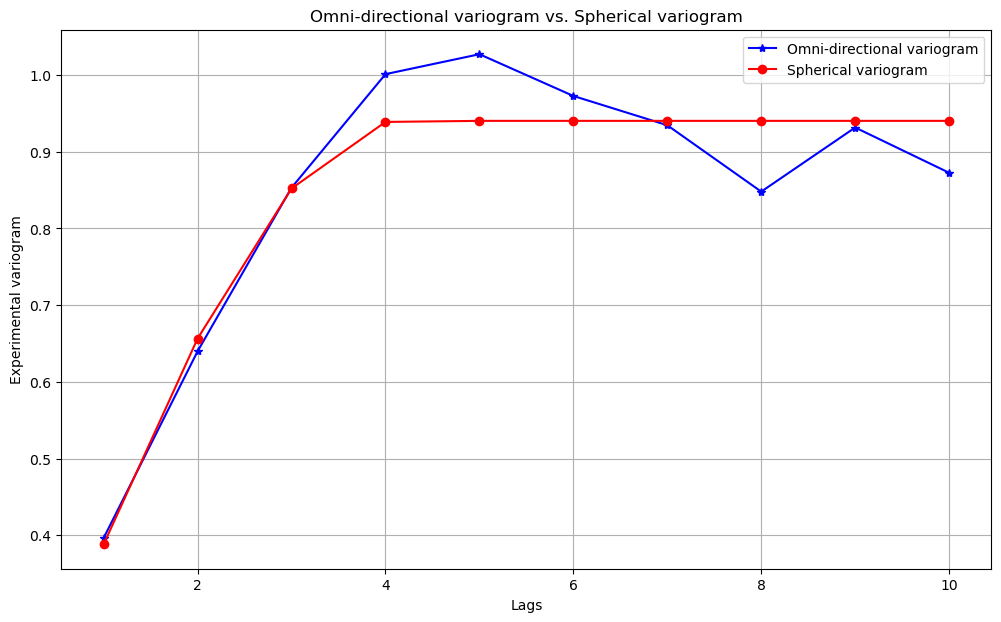

In [21]:
# comparing omni-directional variogram with spherical variogram
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(lag_dist, Expdirvar, '-*', c = 'b', label = 'Omni-directional variogram')
ax.plot(lag_dist, gamma_h_sph, '-o', c = 'r', label = 'Spherical variogram')
ax.grid(True)
ax.set_xlabel('Lags')
ax.set_ylabel('Experimental variogram')
ax.set_title('Omni-directional variogram vs. Spherical variogram')
plt.legend()
plt.show()

#### Constructing Large grid of the data

In [22]:
x = np.asmatrix(df['% Easting(km)']).T
y = np.asmatrix(df['Northing(km)']).T
poro = np.asmatrix(df['Porosity (%)']).T
print('Easting: \n', x)
print('\nNorthing: \n', y)
print('\nPorosity: \n', poro)

Easting: 
 [[ 0.51]
 [ 0.1 ]
 [ 0.52]
 [ 0.93]
 [ 0.89]
 [ 1.55]
 [ 2.91]
 [ 2.78]
 [ 2.74]
 [ 2.29]
 [ 1.7 ]
 [ 1.91]
 [ 2.69]
 [ 3.59]
 [ 4.04]
 [ 5.49]
 [ 4.67]
 [ 3.97]
 [ 3.48]
 [ 3.72]
 [ 3.69]
 [ 4.47]
 [ 3.61]
 [ 5.05]
 [ 6.37]
 [ 6.57]
 [ 6.25]
 [ 7.35]
 [ 7.19]
 [ 5.2 ]
 [ 4.87]
 [ 7.46]
 [ 7.1 ]
 [ 7.43]
 [ 7.31]
 [ 9.17]
 [ 7.92]
 [ 8.13]
 [ 8.5 ]
 [ 8.29]
 [ 8.49]
 [ 9.89]
 [ 9.89]
 [ 9.15]
 [10.01]
 [11.12]
 [13.39]
 [11.99]
 [12.94]
 [ 9.44]
 [ 9.53]
 [ 8.87]
 [ 9.65]
 [10.77]
 [10.72]
 [10.97]
 [11.3 ]
 [11.55]
 [12.2 ]
 [12.5 ]
 [13.16]
 [13.81]
 [15.05]
 [15.3 ]
 [16.25]
 [18.63]
 [19.04]
 [17.97]
 [16.9 ]
 [17.1 ]
 [18.09]
 [19.28]
 [19.49]
 [16.76]
 [18.33]
 [17.55]
 [16.97]
 [16.31]
 [14.71]
 [14.54]
 [12.9 ]
 [14.09]
 [15.29]
 [14.92]]

Northing: 
 [[11.94]
 [ 8.9 ]
 [ 4.91]
 [ 5.11]
 [ 3.71]
 [ 0.87]
 [ 0.79]
 [ 2.15]
 [ 4.41]
 [ 5.73]
 [11.74]
 [12.19]
 [12.77]
 [14.08]
 [14.54]
 [10.91]
 [ 9.8 ]
 [ 8.57]
 [ 7.54]
 [ 6.88]
 [ 5.07]
 [ 2.31]
 [ 0.59]
 [ 1.94]
 [ 

In [23]:
# computing the mean and standard deviation of porosity
mean_poro = np.mean(poro)
std_poro = np.std(poro, ddof = 1)
poro_ns = (poro - mean_poro)/std_poro # converting porosity values to normal score
n_points = poro_ns.shape[0]
print('The mean of porosity is', np.round(mean_poro, 4))
print('The standard deviation of porosity is', np.round(std_poro, 4))
print('The number of points of normal score porosity is', n_points)

The mean of porosity is 14.7095
The standard deviation of porosity is 0.9746
The number of points of normal score porosity is 84


In [24]:
# setting condition for grid
length_x = 20    #km
length_y = 16    #km  16   km, 20  km
grid_dim_x = 0.1 #km  0.2  km, 0.1 km
grid_dim_y = 0.1 #km  0.16 km, 0.1 km

In [25]:
Nx = np.ceil(length_x/grid_dim_x)
Ny = np.ceil(length_y/grid_dim_y)
ix = np.ceil(x/grid_dim_x)
iy = np.ceil(y/grid_dim_y)
ind = np.argwhere(ix==0)
ix[ind] = 1
ind = np.argwhere(iy==0)
iy[ind] = 1

print('Nx is', Nx)
print('Ny is', Ny)
print('\nIndex x is \n', ix)
print('\nIndex y is \n', iy)

Nx is 200.0
Ny is 160.0

Index x is 
 [[  6.]
 [  1.]
 [  6.]
 [ 10.]
 [  9.]
 [ 16.]
 [ 30.]
 [ 28.]
 [ 28.]
 [ 23.]
 [ 17.]
 [ 20.]
 [ 27.]
 [ 36.]
 [ 41.]
 [ 55.]
 [ 47.]
 [ 40.]
 [ 35.]
 [ 38.]
 [ 37.]
 [ 45.]
 [ 37.]
 [ 51.]
 [ 64.]
 [ 66.]
 [ 63.]
 [ 74.]
 [ 72.]
 [ 52.]
 [ 49.]
 [ 75.]
 [ 71.]
 [ 75.]
 [ 74.]
 [ 92.]
 [ 80.]
 [ 82.]
 [ 85.]
 [ 83.]
 [ 85.]
 [ 99.]
 [ 99.]
 [ 92.]
 [101.]
 [112.]
 [134.]
 [120.]
 [130.]
 [ 95.]
 [ 96.]
 [ 89.]
 [ 97.]
 [108.]
 [108.]
 [110.]
 [113.]
 [116.]
 [122.]
 [125.]
 [132.]
 [139.]
 [151.]
 [153.]
 [163.]
 [187.]
 [191.]
 [180.]
 [169.]
 [171.]
 [181.]
 [193.]
 [195.]
 [168.]
 [184.]
 [176.]
 [170.]
 [164.]
 [148.]
 [146.]
 [129.]
 [141.]
 [153.]
 [150.]]

Index y is 
 [[120.]
 [ 89.]
 [ 50.]
 [ 52.]
 [ 38.]
 [  9.]
 [  8.]
 [ 22.]
 [ 45.]
 [ 58.]
 [118.]
 [122.]
 [128.]
 [141.]
 [146.]
 [110.]
 [ 98.]
 [ 86.]
 [ 76.]
 [ 69.]
 [ 51.]
 [ 24.]
 [  6.]
 [ 20.]
 [ 24.]
 [ 10.]
 [  1.]
 [ 13.]
 [ 20.]
 [ 86.]
 [ 92.]
 [129.]
 [ 90.]
 [ 89.]
 [ 

In [26]:
tick_label_x = np.arange(0, length_x + grid_dim_x, grid_dim_x)
tick_label_x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [27]:
tick_label_y = np.arange(0, length_y + grid_dim_y, grid_dim_y)
tick_label_y

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

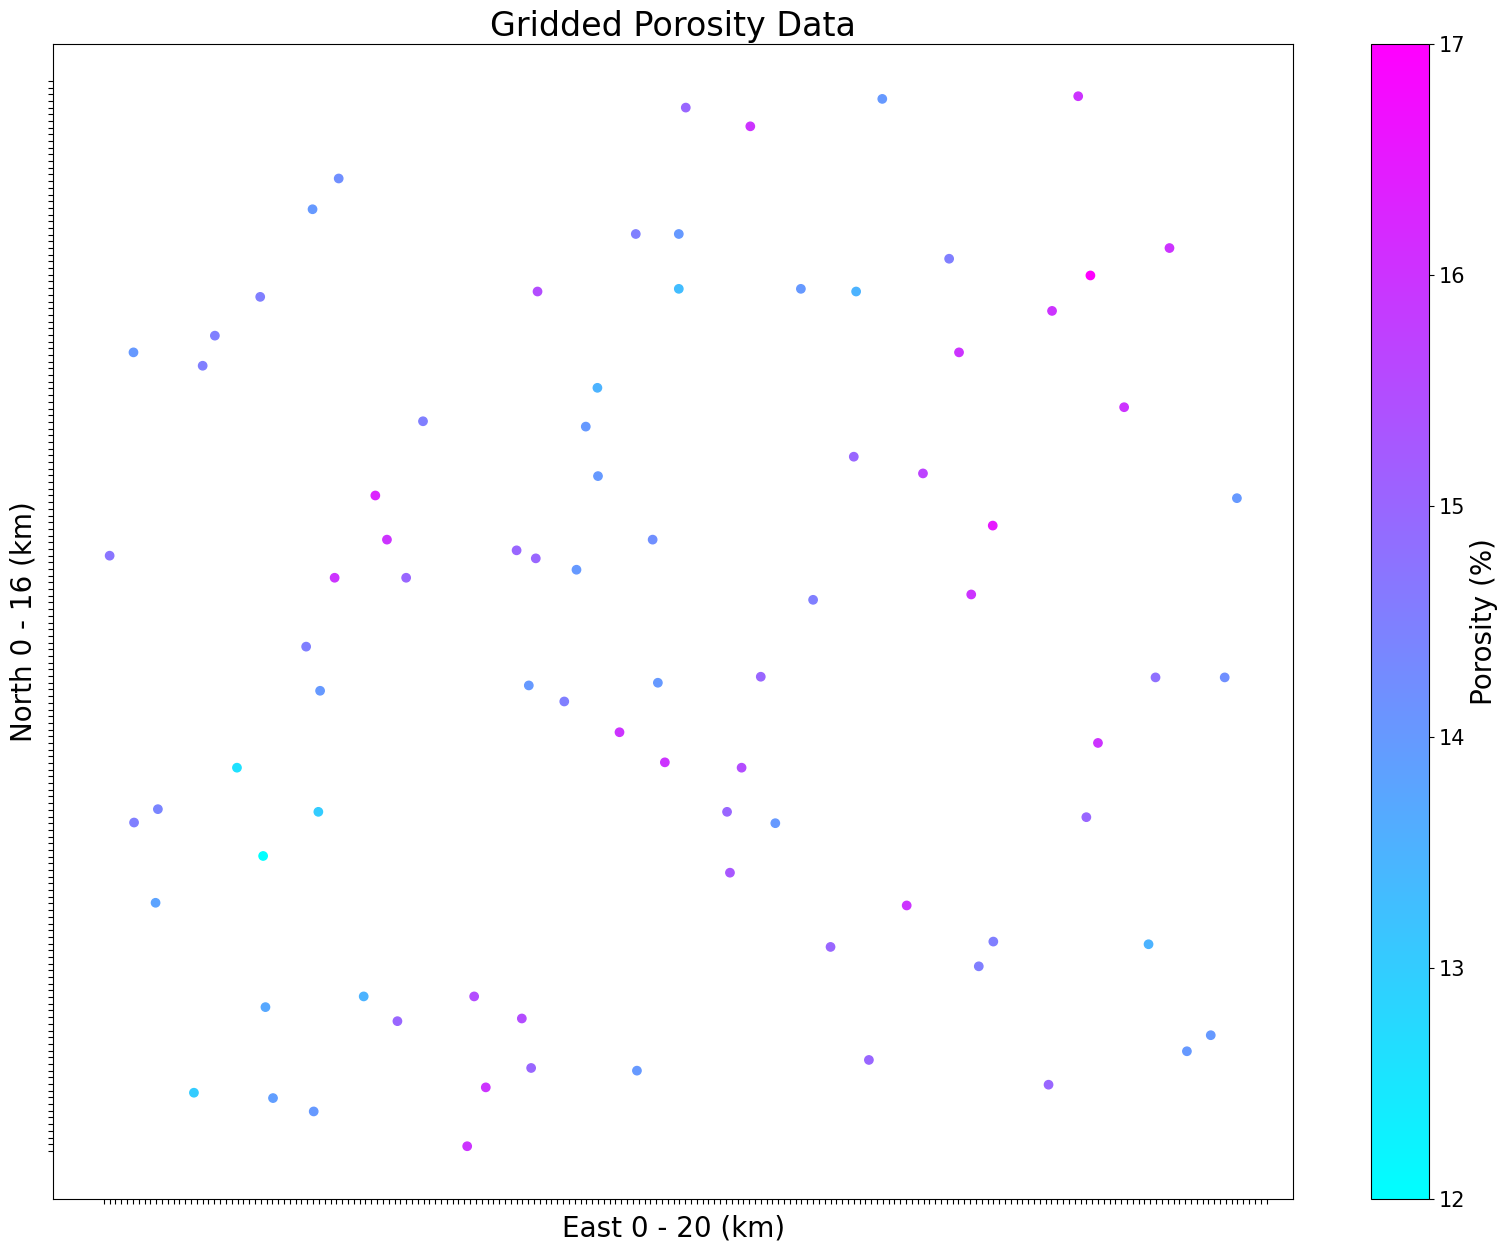

In [28]:
x_cord = df['% Easting(km)']
y_cord = df['Northing(km)']
poro_val = df['Porosity (%)']

fig, ax = plt.subplots(figsize = (20, 15))
im = ax.scatter(x_cord, y_cord, c = poro_val, cmap = 'cool')
ax.set_yticks(tick_label_y)
ax.set_xticks(tick_label_x)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_title('Gridded Porosity Data', fontsize = 24)
ax.set_xlabel('East 0 - 20 (km)', fontsize = 20)
ax.set_ylabel('North 0 - 16 (km)', fontsize = 20)
cb = fig.colorbar(im, ax = ax)
cb.set_label(label = 'Porosity (%)', fontsize = 20)
cb.ax.tick_params(labelsize = 15)
plt.show()

This plot shows the porosity data populated on grid with size of each grid cell being 100 by 100 meter. This is done as a means to pre estimation debaising  

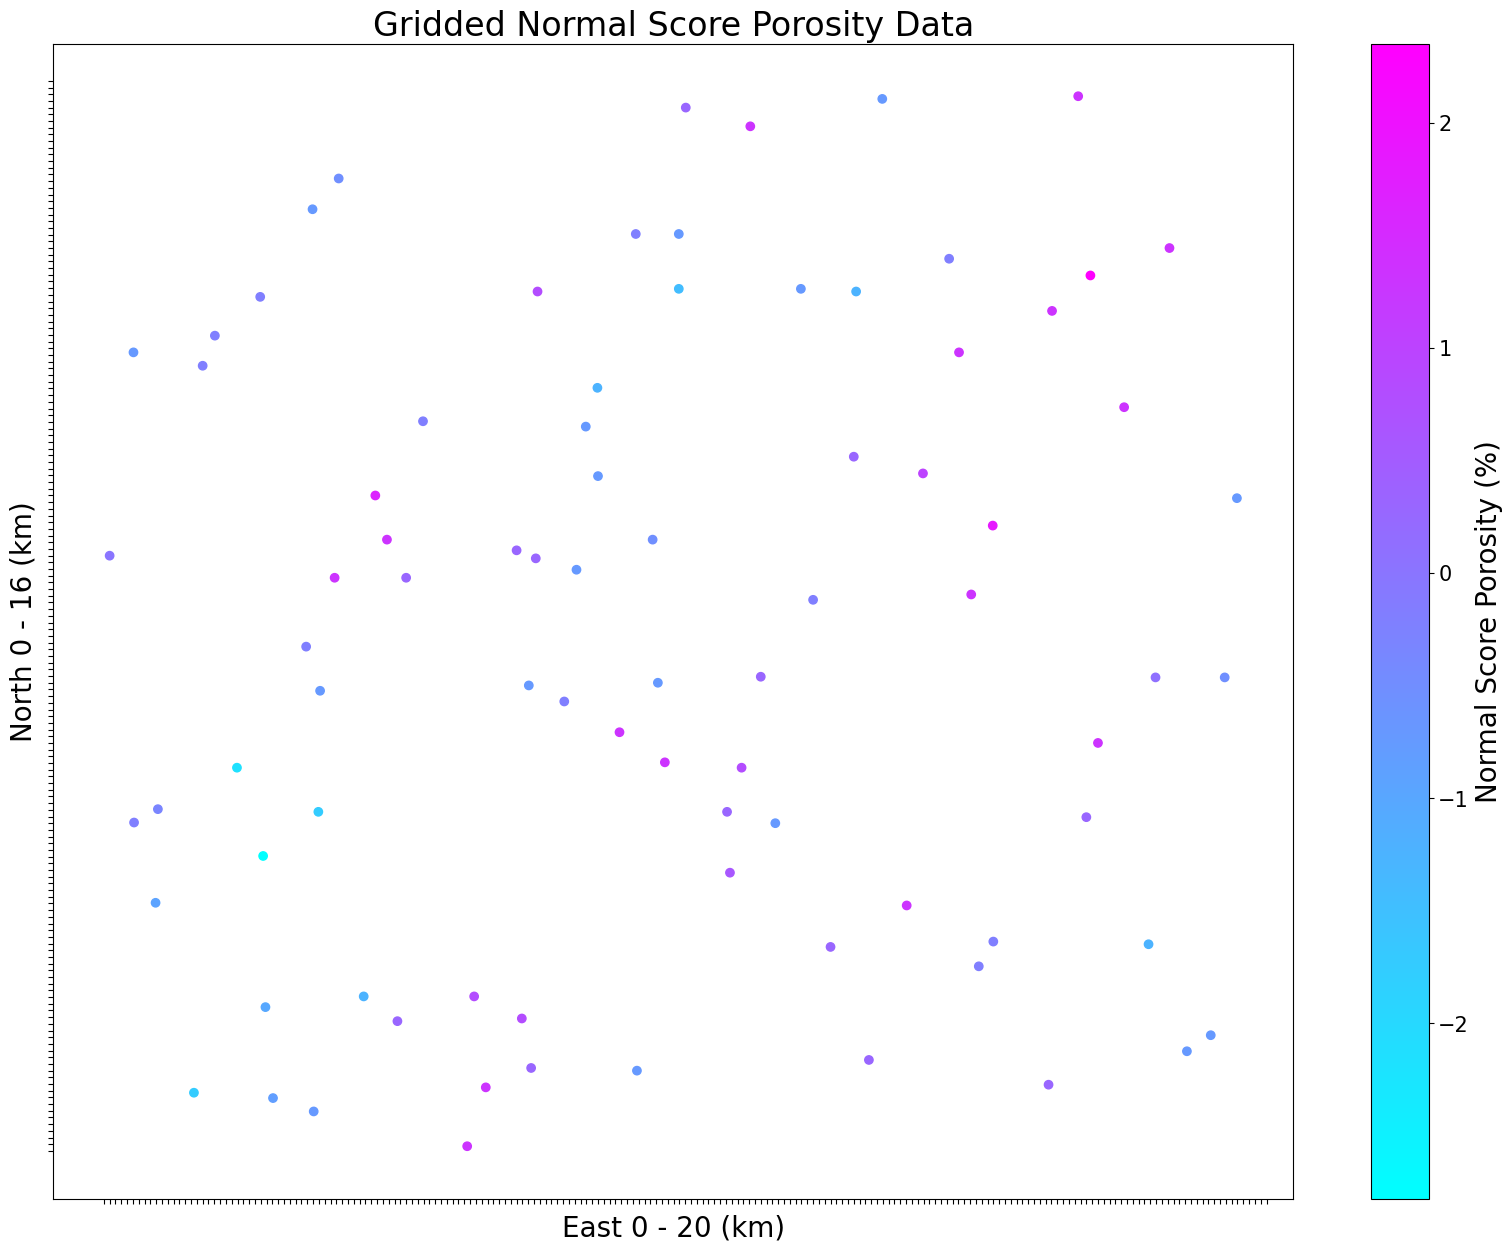

In [29]:
poro_ns_val = np.asarray(poro_ns)

fig, ax = plt.subplots(figsize = (20, 15))
im = ax.scatter(x_cord, y_cord, c = poro_ns_val, cmap = 'cool')
ax.set_yticks(tick_label_y)
ax.set_xticks(tick_label_x)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_title('Gridded Normal Score Porosity Data', fontsize = 24)
ax.set_xlabel('East 0 - 20 (km)', fontsize = 20)
ax.set_ylabel('North 0 - 16 (km)', fontsize = 20)
cb = fig.colorbar(im, ax = ax)
cb.set_label(label = 'Normal Score Porosity (%)', fontsize = 20)
cb.ax.tick_params(labelsize = 15)
plt.show()

Same plot as above but using the normal score porosity values

#### Computing Simple Kriging Estimate with Error Variance

In [30]:
length_x = 20 #km
length_y = 16 #km  16   km, 20  km
grid_x = 0.1  #km  0.2  km, 0.1 km
grid_y = 0.1 #km  0.16 km, 0.1 km

Nx = np.ceil(length_x/grid_x)
Ny = np.ceil(length_y/grid_y)
ix = np.ceil(x/grid_x) #Index of grid
iy = np.ceil(y/grid_y)
ind = np.argwhere(ix == 0)
ix[ind] = 1
print('Nx is', Nx)
print('Ny is', Ny)

Nx is 200.0
Ny is 160.0


In [31]:
loc = (iy - 1)*Nx + ix
bin_points = np.arange(1, int(Nx)*int(Ny) + 2)
hist = np.histogram(loc, bins = bin_points)
count = hist[0]
grid = hist[1]
grid = grid[:-1]

In [32]:
easting = np.asarray(df['% Easting(km)'])
northing = np.asarray(df['Northing(km)'])
poro = np.asarray(df['Porosity (%)'])

x = np.asmatrix(easting).T
y = np.asmatrix(northing).T
ix = np.asmatrix(ix).T
iy = np.asmatrix(iy).T
loc = np.asmatrix(loc).T
poro = np.asmatrix(poro).T
poro

matrix([[14. ],
        [14.7],
        [14.5],
        [14.4],
        [13.8],
        [13. ],
        [13.9],
        [13.7],
        [12. ],
        [12.6],
        [14.5],
        [14.5],
        [14.5],
        [14. ],
        [14.2],
        [14.5],
        [16.3],
        [16. ],
        [14.5],
        [14. ],
        [13. ],
        [13.5],
        [14. ],
        [15. ],
        [15.5],
        [16. ],
        [16. ],
        [15. ],
        [15.5],
        [15. ],
        [16. ],
        [15.5],
        [15. ],
        [15. ],
        [14. ],
        [14. ],
        [14.5],
        [14. ],
        [14. ],
        [14. ],
        [13.5],
        [13.3],
        [14. ],
        [14.5],
        [15. ],
        [16. ],
        [14. ],
        [14. ],
        [13.5],
        [14.2],
        [14. ],
        [16. ],
        [16. ],
        [15.3],
        [15. ],
        [15.5],
        [15. ],
        [14. ],
        [14.5],
        [15. ],
        [15. ],
        [16. ],
        

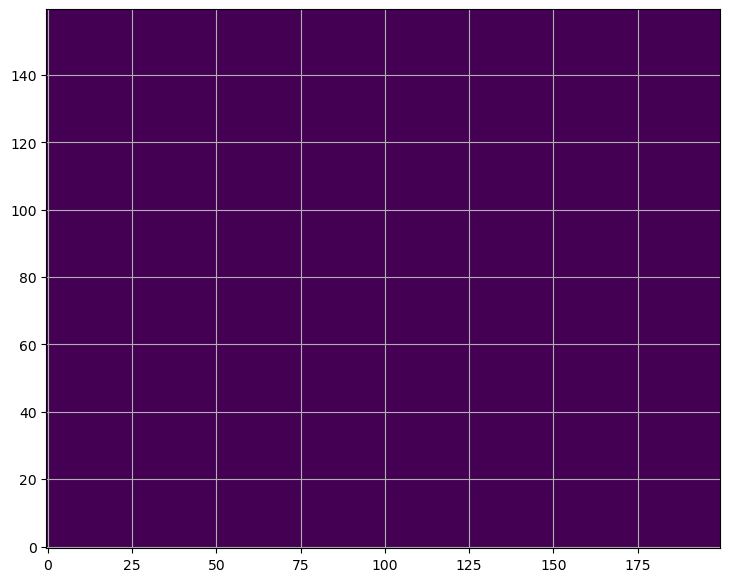

In [33]:
# Plottig empty grid to be used for krigging
poro_grid_sk = np.zeros([int(Ny), int(Nx)])
var_grid_sk = np.zeros([int(Ny), int(Nx)])
plt.figure(figsize = (10, 7))
plt.imshow(poro_grid_sk)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [34]:
# looping through the grid the locate all occupied positions 
for g in range(0, len(grid)):
    index = np.argwhere(loc == grid[g])
    ny = np.ceil(grid[g]/Nx)
    nx = (grid[g] - (ny - 1)*Nx)
    if index.size != 0:
        poro_grid_sk[int(ny) - 1, int(nx) - 1] = np.sum(poro[index[:,0],0])/index.shape[0]

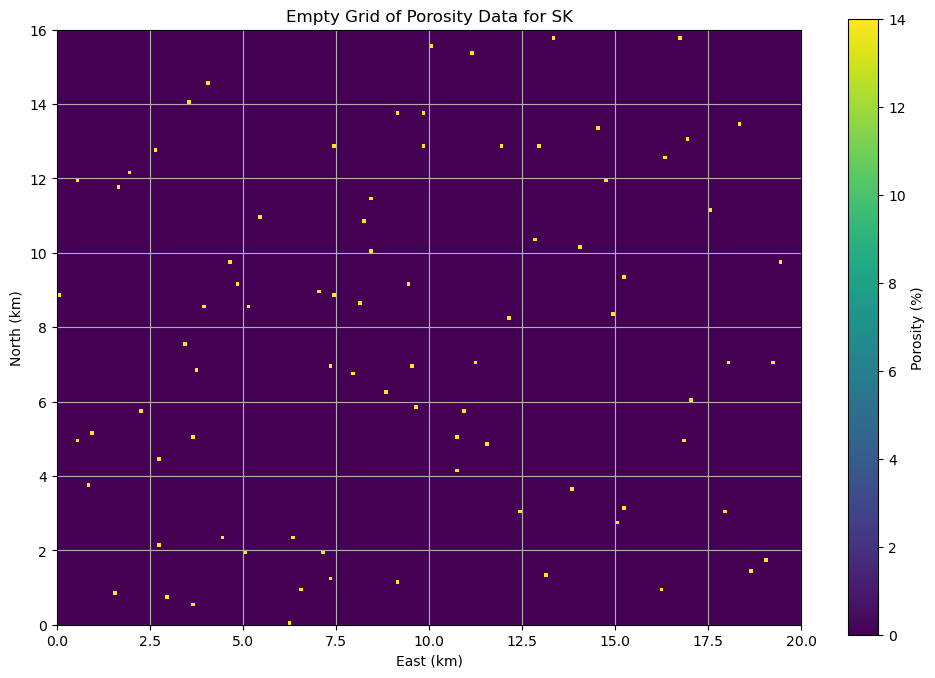

In [35]:
# Populated grid
plt.figure(figsize = (12, 8))
plt.imshow(poro_grid_sk, extent = [0, length_x, length_y, 0])
plt.title('Empty Grid of Porosity Data for SK')
plt.xlabel('East (km)')
plt.ylabel('North (km)')
plt.gca().invert_yaxis()
plt.colorbar(label = 'Porosity (%)')
plt.grid(True)
plt.show()

In [36]:
unknown_grid = grid[count == 0]
unknown_grid

array([    1,     2,     3, ..., 31998, 31999, 32000])

In [37]:
grid_dim_x = 0.1 #km
grid_dim_y = 0.1 #km

In [38]:
#Simple Kriging
for ug in range(0, len(unknown_grid)):
    ny = np.ceil(unknown_grid[ug]/Nx)
    nx = (unknown_grid[ug] - (ny - 1)*Nx)
    x_cord = ((nx - 1)*grid_dim_x + nx*grid_dim_x)/2
    y_cord = ((ny - 1)*grid_dim_y + ny*grid_dim_y)/2
    
    dist_uk_k = np.sqrt(np.power(x - x_cord, 2) + np.power(y - y_cord, 2))
    points_wi_radius = np.argwhere(dist_uk_k < 4.5)
    ones_vec = np.asmatrix(np.ones(points_wi_radius.shape[0]))
    
    x_known = x[points_wi_radius[:,0]]*ones_vec
    y_known = y[points_wi_radius[:,0]]*ones_vec
    
    dist = np.sqrt(np.power((x_known - x_known.T), 2) + np.power((y_known - y_known.T), 2))
    dist_uk_wr = dist_uk_k[points_wi_radius[:,0]]
    
    gamma_known = sph_var(dist, range_a, sill, nugget)
    cov_known = (nugget + sill) - gamma_known
                   
    gamma_unknown = sph_var(dist_uk_wr, range_a, sill, nugget)
    cov_unknown = (nugget + sill) - gamma_unknown
    lamb = np.linalg.inv(cov_known)*cov_unknown
    
    poro_grid_sk[int(ny) - 1, int(nx) - 1] = lamb.T*(poro[points_wi_radius[:,0]] - np.mean(poro)) + np.mean(poro)
    var_grid_sk[int(ny) - 1, int(nx) - 1] = (nugget + sill) - lamb.T*cov_unknown

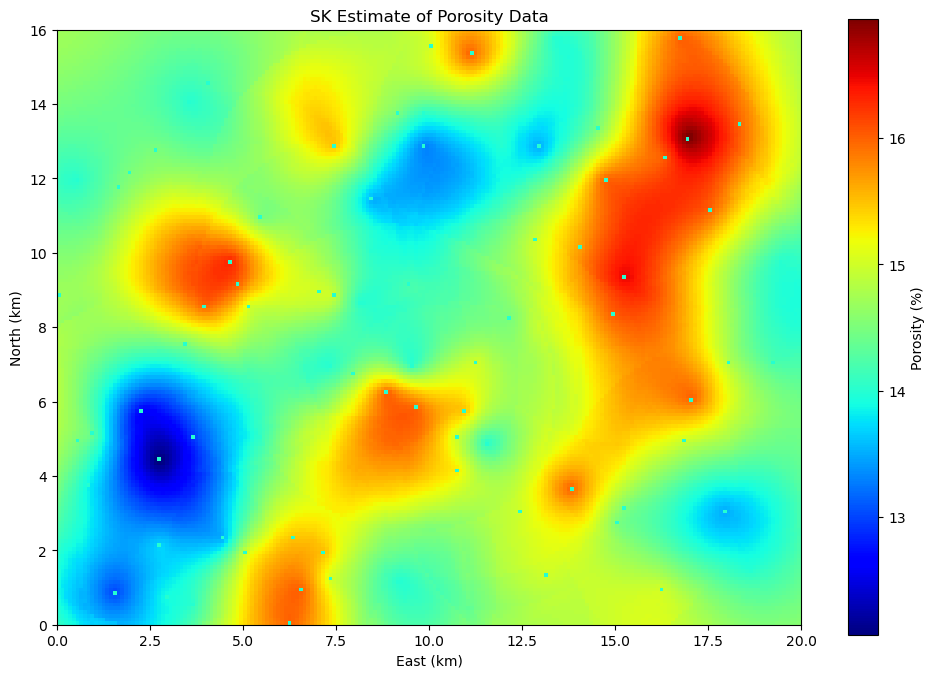

In [39]:
# plotting simple krigging results
plt.figure(figsize = (12, 8))
plt.imshow(poro_grid_sk, cmap = 'jet', extent = [0, length_x, length_y, 0])
plt.title('SK Estimate of Porosity Data')
plt.xlabel('East (km)')
plt.ylabel('North (km)')
plt.gca().invert_yaxis()
plt.grid(False)
plt.colorbar(label = 'Porosity (%)')
plt.show()

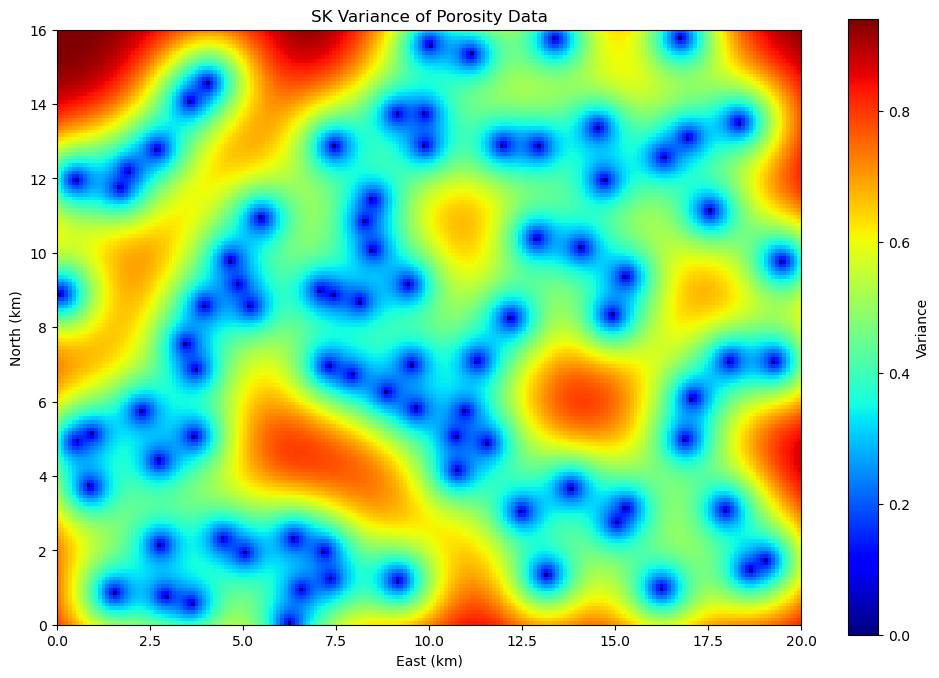

In [40]:
# Plotting the variance of the estimate to show the degree of uncertainty.
plt.figure(figsize = (12, 8))
plt.imshow(var_grid_sk, cmap = 'jet', extent = [0, length_x, length_y, 0])
plt.title('SK Variance of Porosity Data')
plt.xlabel('East (km)')
plt.ylabel('North (km)')
plt.gca().invert_yaxis()
plt.grid(False)
plt.colorbar(label = 'Variance')
plt.show()

# Ordinary krigging

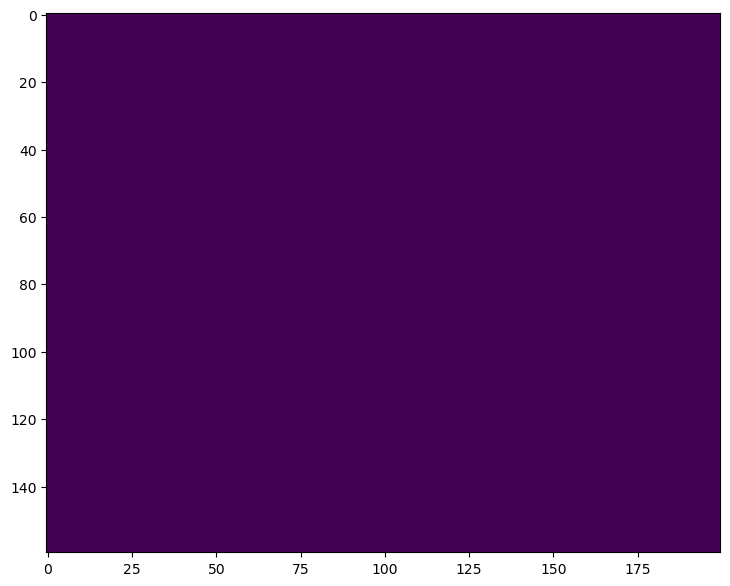

In [42]:
poro_grid_ok = np.zeros([int(Ny), int(Nx)])
var_grid_ok = np.zeros([int(Ny), int(Nx)])
plt.figure(figsize = (10, 7))
plt.imshow(poro_grid_ok)
plt.show()

In [43]:
for g in range(0, len(grid)):
    index = np.argwhere(loc == grid[g])
    ny = np.ceil(grid[g]/Nx)
    nx = (grid[g] - (ny - 1)*Nx)
    if index.size != 0:
        poro_grid_ok[int(ny) - 1, int(nx) - 1] = np.sum(poro[index[:,0],0])/index.shape[0]

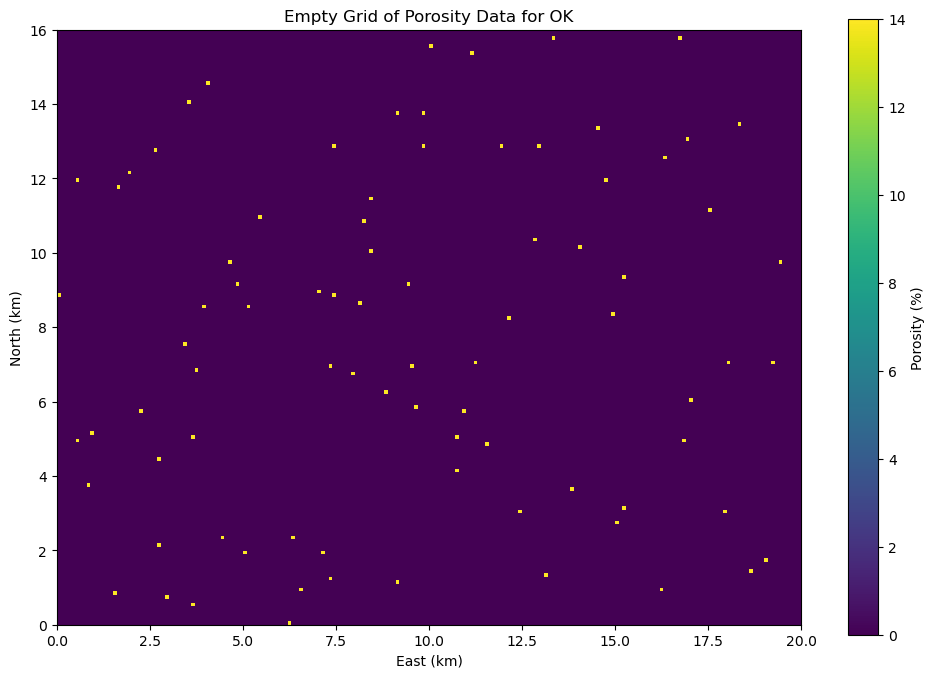

In [44]:
plt.figure(figsize = (12, 8))
plt.imshow(poro_grid_ok, extent = [0, length_x, length_y, 0])
plt.title('Empty Grid of Porosity Data for OK')
plt.xlabel('East (km)')
plt.ylabel('North (km)')
plt.gca().invert_yaxis()
plt.colorbar(label = 'Porosity (%)')
plt.show()

In [45]:
#Ordinary Kriging
for ug in range(0, len(unknown_grid)):
    ny = np.ceil(unknown_grid[ug]/Nx)
    nx = (unknown_grid[ug] - (ny - 1)*Nx)
    x_cord = ((nx - 1)*grid_x + nx*grid_x)/2
    y_cord = ((ny - 1)*grid_y + ny*grid_y)/2
    
    dist_uk_k = np.sqrt(np.power(x - x_cord, 2) + np.power(y - y_cord, 2)) #Distance between unknown and known points
    points_wi_radius = np.argwhere(dist_uk_k < 4.5) #Radius is 4.5 km
    ones_vec = np.asmatrix(np.ones(points_wi_radius.shape[0]))
    
    x_known = x[points_wi_radius[:,0]]*ones_vec
    y_known = y[points_wi_radius[:,0]]*ones_vec
    
    dist = np.sqrt(np.power((x_known - x_known.T), 2) + np.power((y_known - y_known.T), 2)) #Distance between known points
    dist_uk_wr = dist_uk_k[points_wi_radius[:,0]] #Distance between unknown points within radius
    
    gamma_known = sph_var(dist, range_a, sill, nugget) #Exponential Variogram
    cov_known = (nugget + sill) - gamma_known #Covariance of known points
    cov_ok_known = np.r_[cov_known, ones_vec]

    col_vec = np.r_[ones_vec.T, np.asmatrix(0)]
    cov_ok_known = np.c_[cov_ok_known, col_vec]
                   
    gamma_unknown = sph_var(dist_uk_wr, range_a, sill, nugget) #Exponential Variogram
    cov_unknown = (nugget + sill) - gamma_unknown #Covariance of unknown points
    cov_ok_unknown = np.r_[cov_unknown, np.asmatrix(1)]
    lamb_ok = np.linalg.inv(cov_ok_known)*cov_ok_unknown
    
    poro_grid_ok[int(ny) - 1, int(nx) - 1] = lamb_ok[:-1].T*(poro[points_wi_radius[:,0]])
    var_grid_ok[int(ny) - 1, int(nx) - 1] = (nugget + sill) - lamb_ok[:-1].T*cov_ok_unknown[:-1] - lamb_ok[-1]

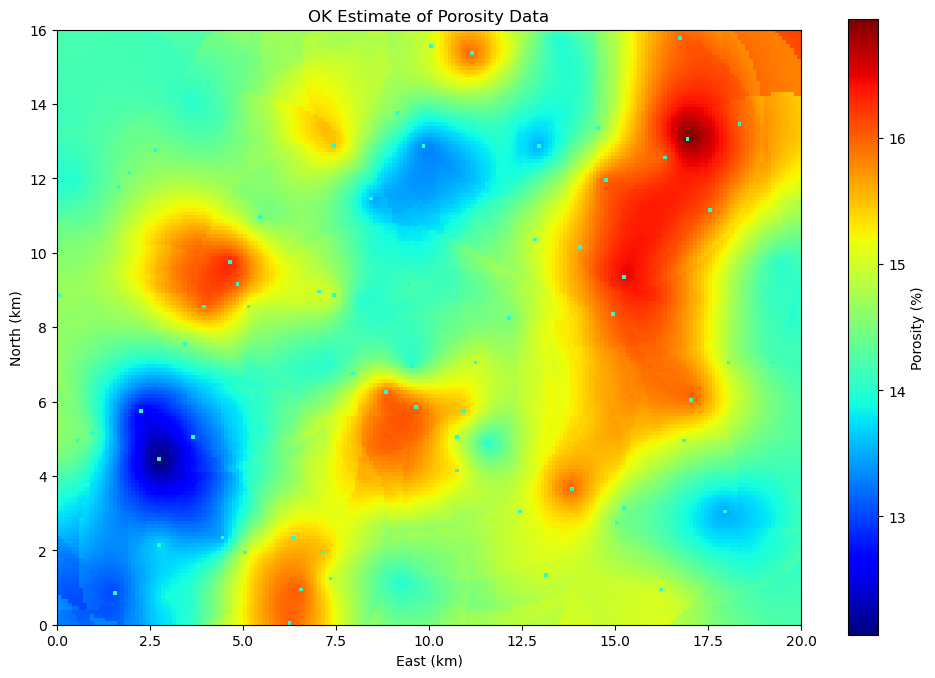

In [46]:
# Plotting ordinary krigging results
plt.figure(figsize = (12, 8))
plt.imshow(poro_grid_ok, cmap = 'jet', extent = [0, length_x, length_y, 0])
plt.title('OK Estimate of Porosity Data')
plt.xlabel('East (km)')
plt.ylabel('North (km)')
plt.gca().invert_yaxis()
plt.grid(False)
plt.colorbar(label = 'Porosity (%)')
plt.show()

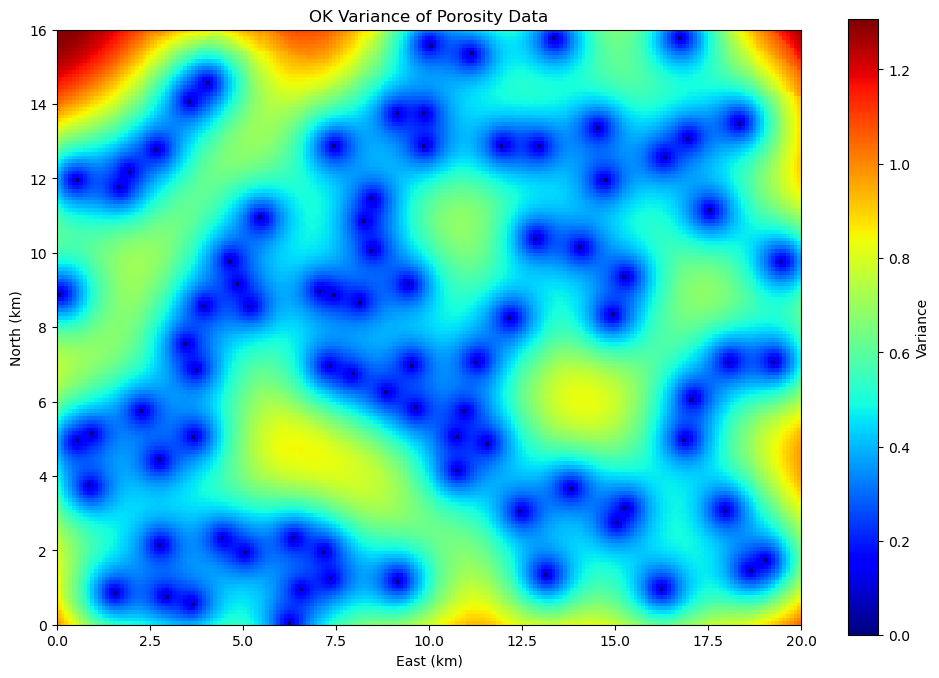

In [47]:
# Plotting the variance of the estimate to show the degree of uncertainty.
plt.figure(figsize = (12, 8))
plt.imshow(var_grid_ok, cmap = 'jet', extent = [0, length_x, length_y, 0])
plt.title('OK Variance of Porosity Data')
plt.xlabel('East (km)')
plt.ylabel('North (km)')
plt.gca().invert_yaxis()
plt.grid(False)
plt.colorbar(label = 'Variance')
plt.show()

# Computing Siquential Gaussian Simulation (SGSIM) of data using simple kriging

In [48]:
loc = (iy - 1)*Nx + ix
bin_points = np.arange(1, Nx*Ny + 2)
hist = np.histogram(loc, bins = bin_points)
count = hist[0]
grid_num = hist[1]
grid_num = grid_num[:-1]

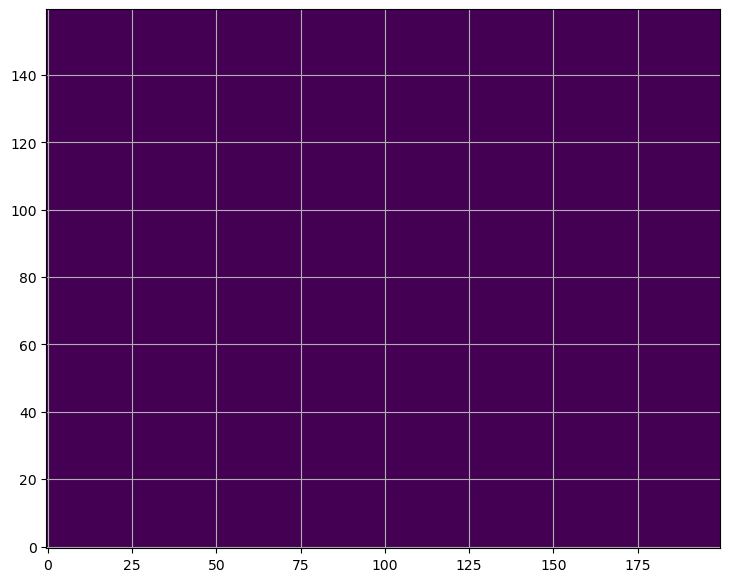

In [49]:
# Empty grid for SGSIM
poro_ns_grid = np.ones((int(Ny), int(Nx)))*(-9999)
var_ns_grid = np.zeros((int(Ny), int(Nx)))
plt.figure(figsize = (10, 7))
plt.imshow(poro_ns_grid)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [50]:
for g in range(0, len(grid_num)):
    index = np.argwhere(loc == grid_num[g])
    ny = np.ceil(grid_num[g]/Nx)
    nx = (grid_num[g] - (ny - 1)*Nx)
    if index.size != 0:
        poro_ns_grid[int(ny) - 1, int(nx) - 1] = np.sum(poro_ns[index[:,0],0])/index.shape[0]

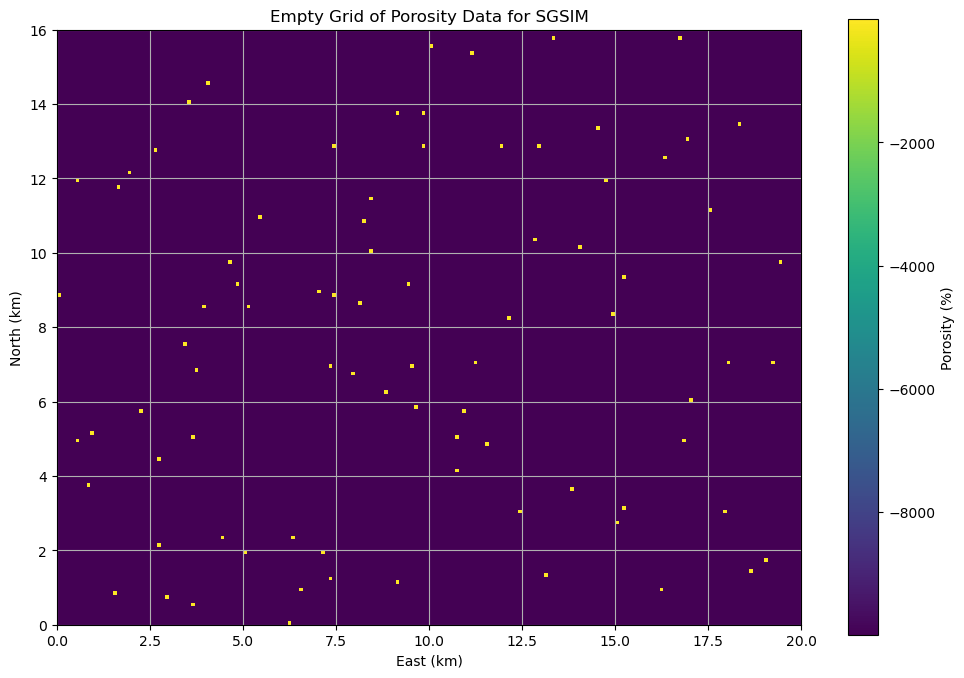

In [51]:
plt.figure(figsize = (12, 8))
plt.imshow(poro_ns_grid, extent = [0, length_x, length_y, 0])
plt.title('Empty Grid of Porosity Data for SGSIM')
plt.xlabel('East (km)')
plt.ylabel('North (km)')
plt.gca().invert_yaxis()
plt.colorbar(label = 'Porosity (%)')
plt.grid(True)
plt.show()

In [52]:
unknown_grids = grid_num[count==0]
unknown_grids

array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 3.1998e+04, 3.1999e+04,
       3.2000e+04])

In [53]:
n_real = 10
poro_ns_real = np.asmatrix(np.zeros([int(Nx)*int(Ny), n_real]))
n_cond_data = 12
for real in range(0, n_real):
    poro_ns_grid_new = poro_ns_grid
    x_data = x
    y_data = y
    poro_ns_data = poro_ns
    np.random.shuffle(unknown_grids)
    print('Realization #', real + 1)
    for ug in range(0, len(unknown_grids)):
        ny = np.ceil(unknown_grids[ug]/Nx)
        nx = (unknown_grids[ug] - (ny - 1)*Nx)
        x_cord = ((nx - 1)*grid_dim_x + nx*grid_dim_x)/2
        y_cord = ((ny - 1)*grid_dim_y + ny*grid_dim_y)/2
        
        dist_uk_k = np.sqrt(np.power(x - x_cord,2) + np.power(y - y_cord,2))
        points_wi_radius = np.argwhere(dist_uk_k < 4.5)
        if points_wi_radius.shape[0] > n_cond_data:  
            points_wi_radius= points_wi_radius[0:n_cond_data,:]
        ones_vec = np.asmatrix(np.ones(points_wi_radius.shape[0]))
            
        x_known = x[points_wi_radius[:,0]]*ones_vec
        y_known = y[points_wi_radius[:,0]]*ones_vec
            
        dist = np.sqrt(np.power((x_known - x_known.T), 2) + np.power((y_known - y_known.T), 2))
        dist_uk_wr = dist_uk_k[points_wi_radius[:,0]] #Distance unknown within radius
        
        gamma_known = sph_var(dist,  range_a, sill, nugget) #Spherical Variogram
        cov_known = (nugget + sill) - gamma_known
        
        gamma_unknown = sph_var(dist_uk_wr, range_a, sill, nugget)
        cov_unknown = (nugget + sill) - gamma_unknown
        lamb = np.linalg.inv(cov_known)*cov_unknown
        
        krig_est = lamb.T*(poro_ns[points_wi_radius[:,0]])
        krig_var = (nugget + sill) - lamb.T*cov_unknown
        sample = krig_est + (np.power(krig_var, 0.5))*np.random.randn(1)
        poro_ns_grid_new[int(ny) - 1, int(nx) - 1] = sample
        
        #if x_data.shape[0] <= (n_points + n_cond_data):
        #if x_data.shape[0] > (n_points + n_cond_data):
        x_data = np.r_[x_data, np.asmatrix(x_cord)]
        y_data = np.r_[y_data, np.asmatrix(y_cord)]
        poro_ns_data = np.r_[poro_ns_data, np.asmatrix(sample)]
    
    poro_ns_real[:,real] = poro_ns_grid_new.reshape((int(Nx)*int(Ny), 1))

Realization # 1
Realization # 2
Realization # 3
Realization # 4
Realization # 5
Realization # 6
Realization # 7
Realization # 8
Realization # 9
Realization # 10


In [54]:
# Converting normal score porosity to original porosity
poro_real = poro_ns_real*std_poro + mean_poro
poro_real.shape

(32000, 10)

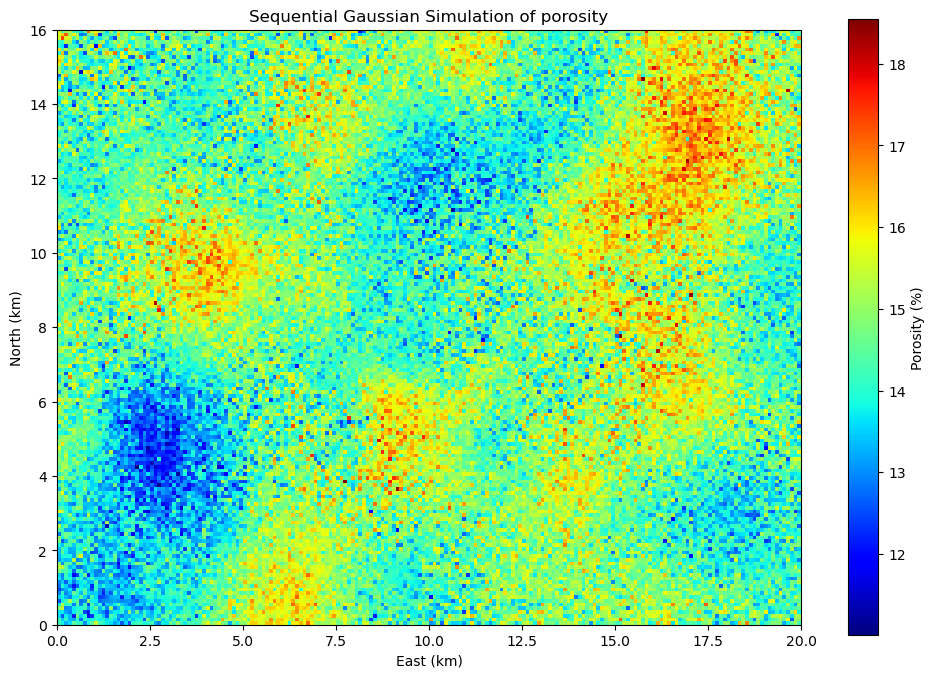

In [55]:
# Showing first porosity plot
poro_real_grid = poro_real[:,0].reshape((int(Ny), int(Nx)))

plt.figure(figsize = (12, 8))
plt.imshow(poro_real_grid, cmap = 'jet', extent = [0, length_x, length_y, 0])
plt.gca().invert_yaxis()
plt.colorbar(label = 'Porosity (%)')
plt.title('Sequential Gaussian Simulation of porosity')
plt.xlabel('East (km)')
plt.ylabel('North (km)')
plt.grid(False)
plt.show()

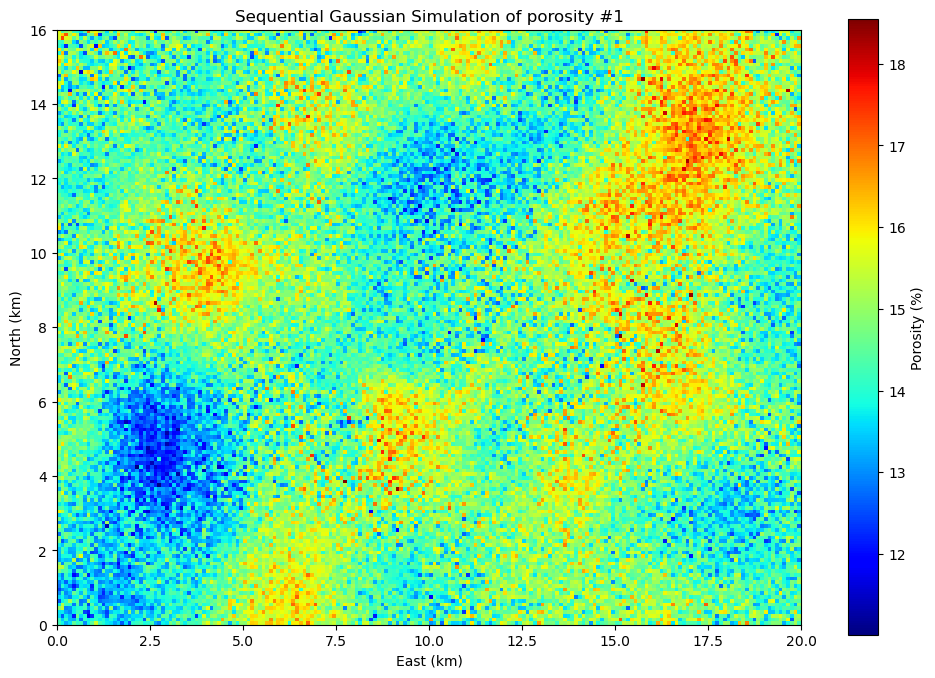

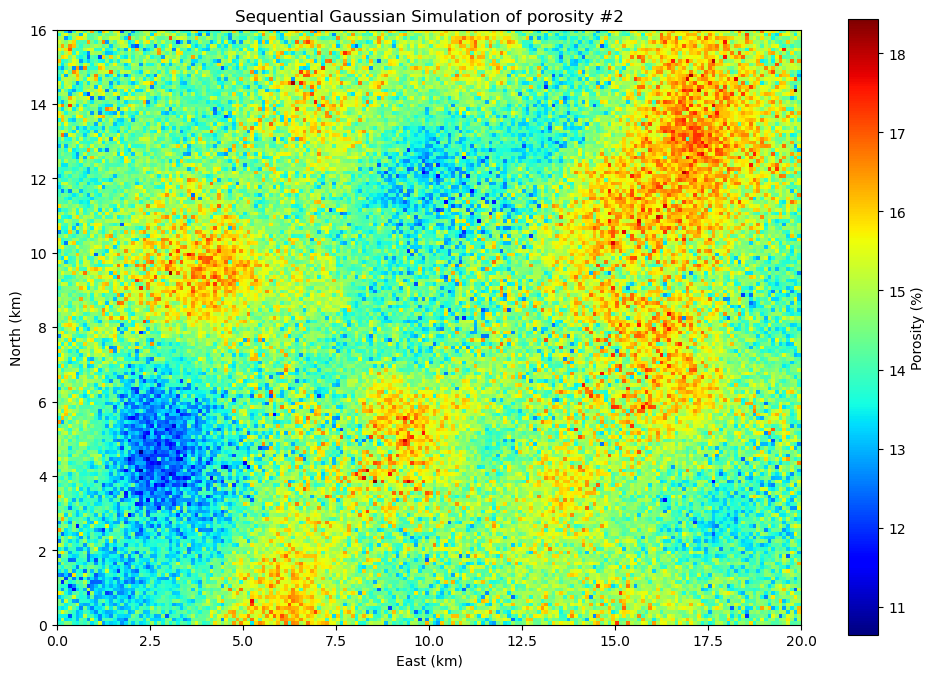

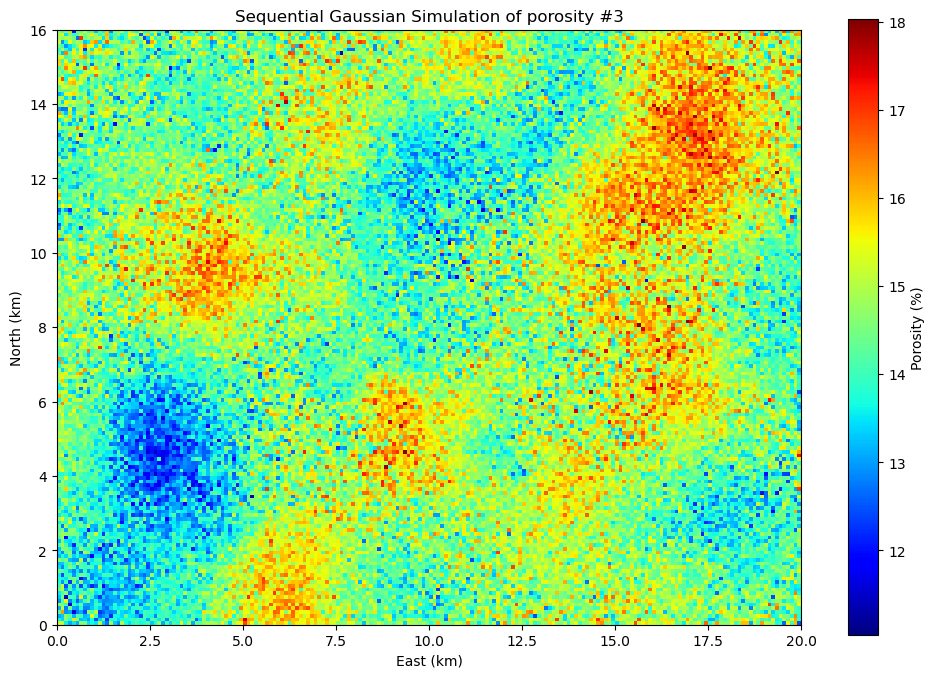

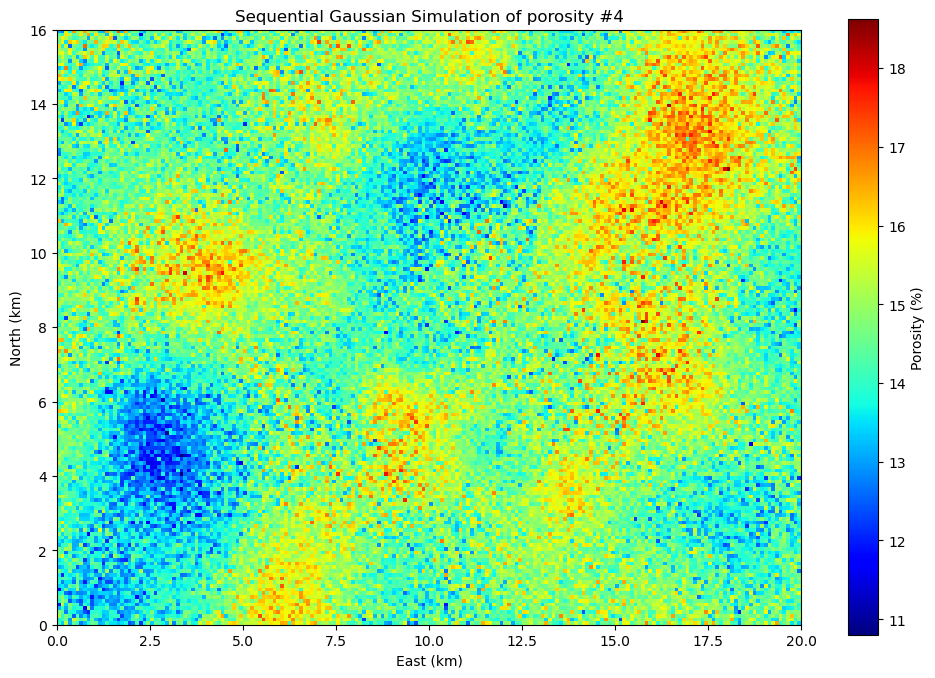

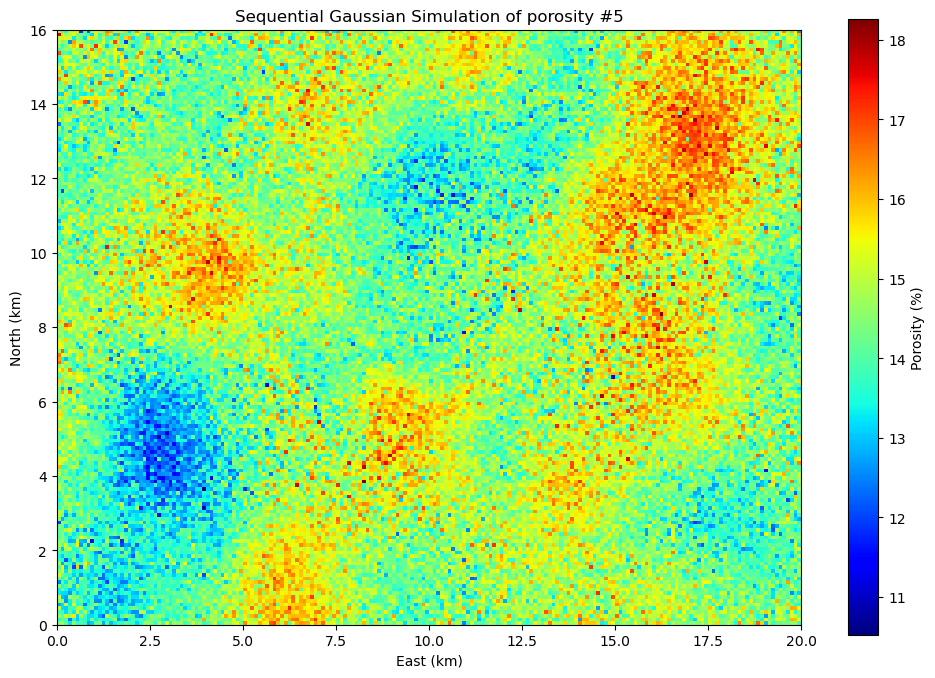

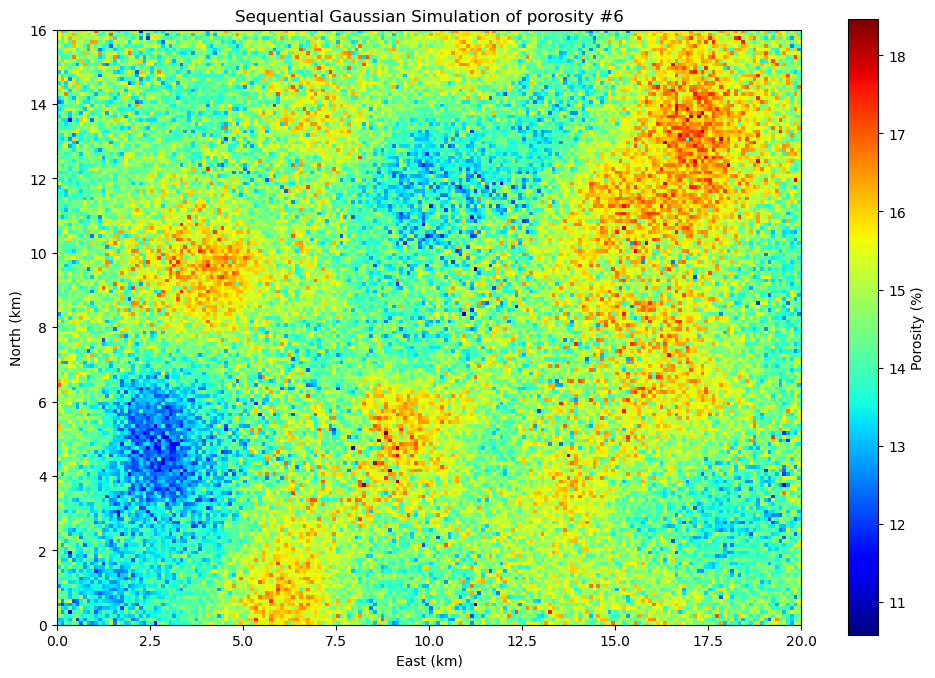

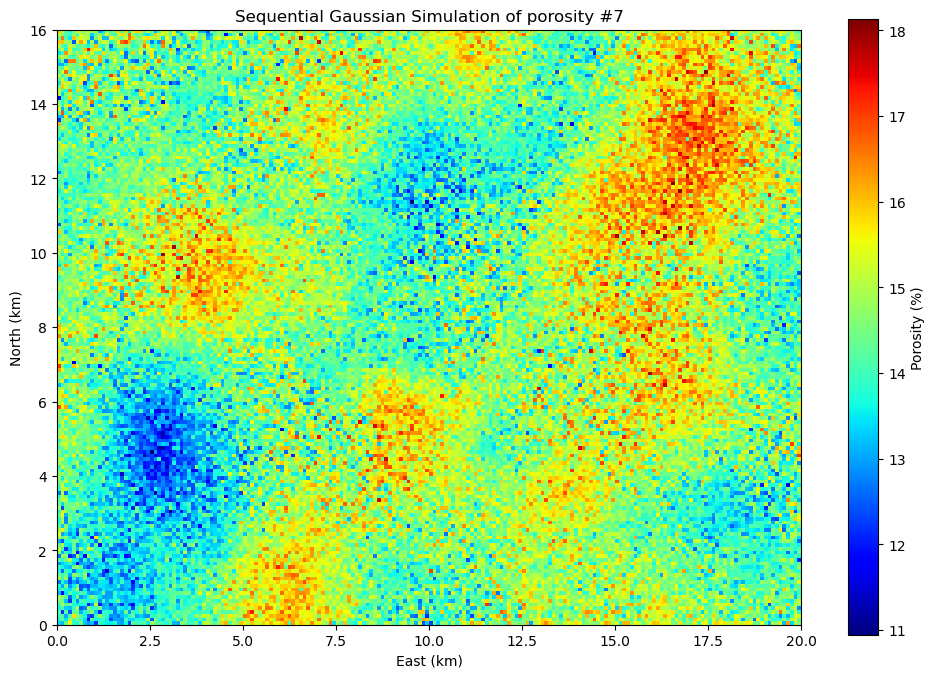

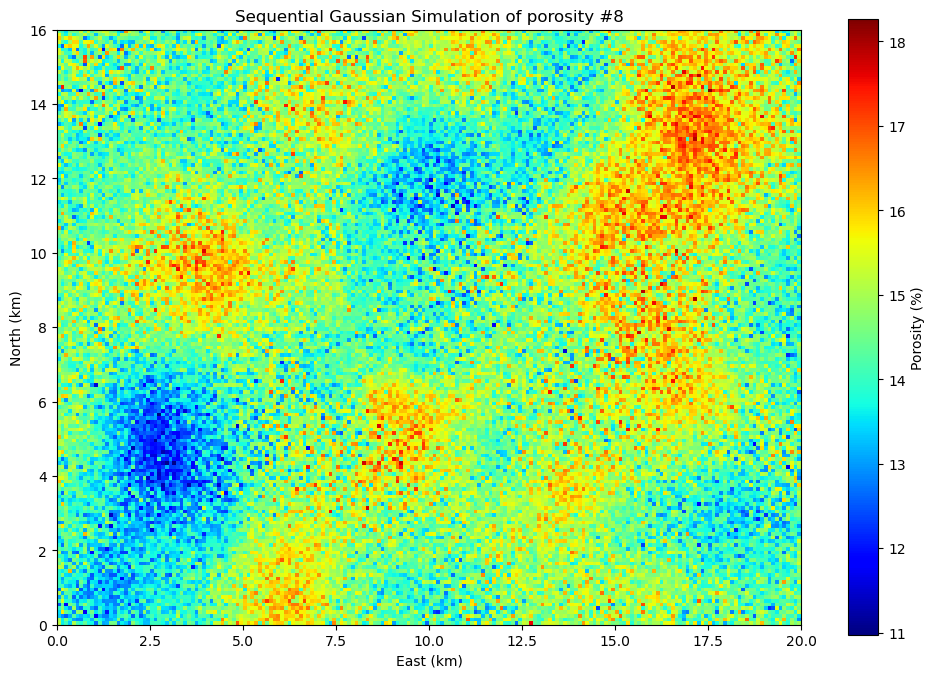

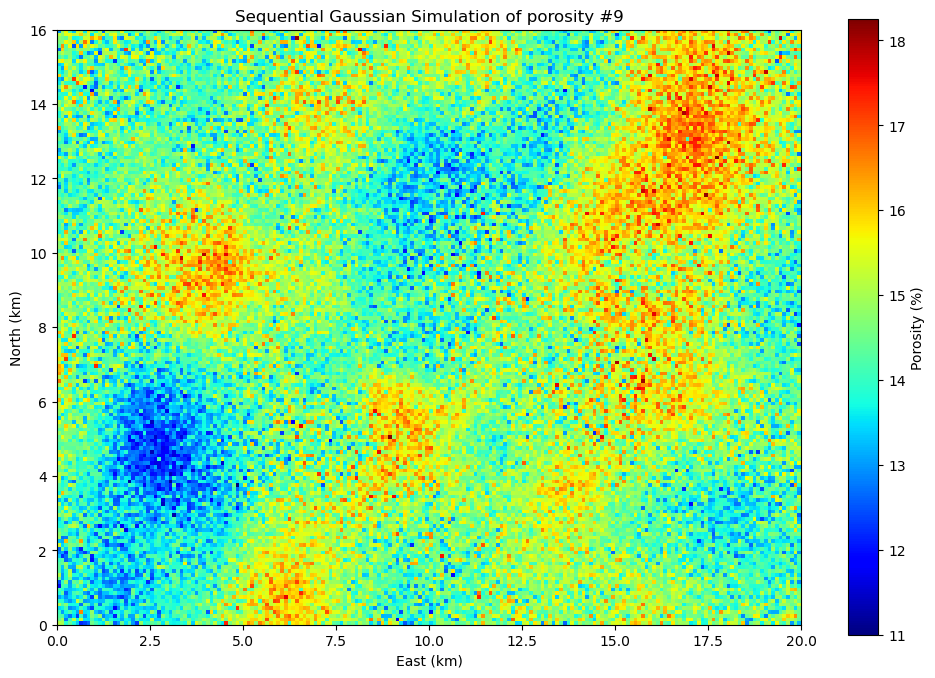

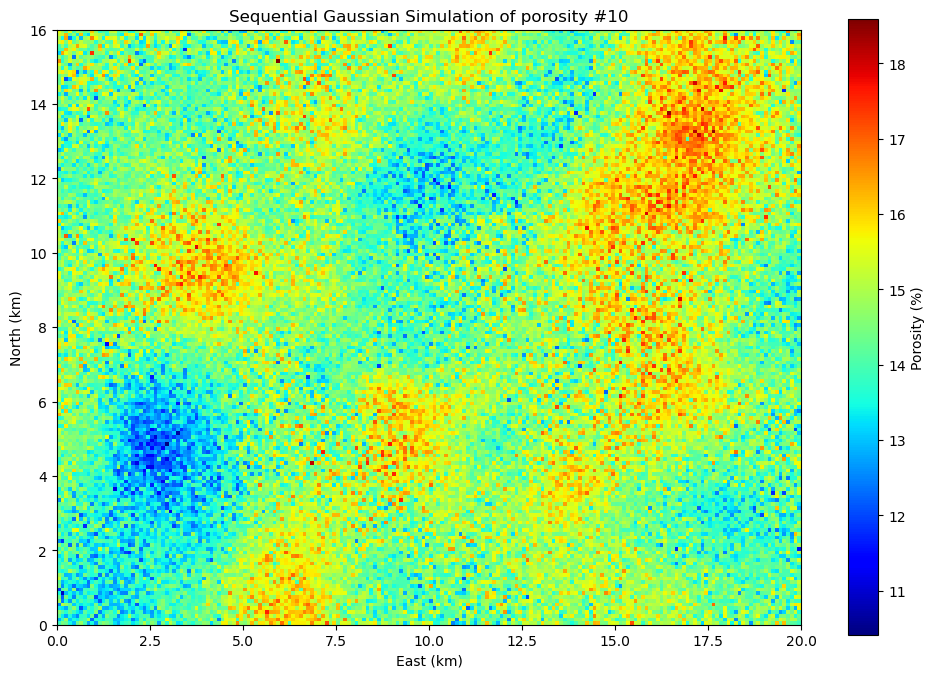

In [56]:
n_real = 10
for i in range(n_real):
    poro_real_grid_10_real = poro_real[:,i].reshape((int(Ny), int(Nx)))
    plt.figure(figsize = (12, 8))
    plt.imshow(poro_real_grid_10_real, cmap = 'jet', extent = [0, length_x, length_y, 0])
    plt.colorbar(label = 'Porosity (%)')
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.title('Sequential Gaussian Simulation of porosity #' + str(i + 1))
    plt.xlabel('East (km)')
    plt.ylabel('North (km)')
    plt.show()

In [57]:
poro_real_n10 = poro_real[0:32000,0:10]
poro_real_n10.shape

(32000, 10)

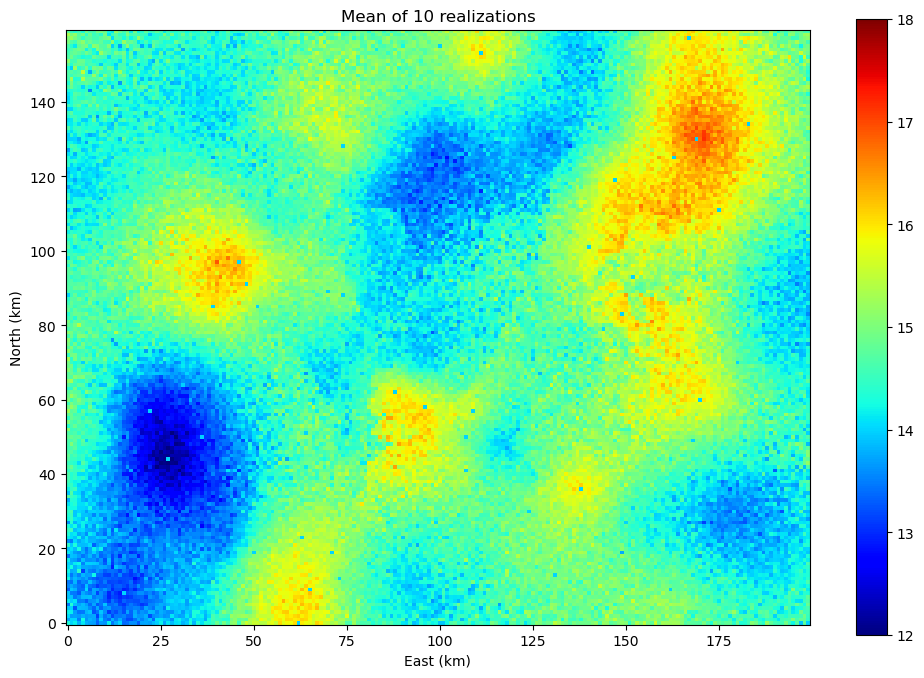

In [58]:
# mean for all realization 
poro_real_n10_mean = np.mean(poro_real_n10, axis = 1)
poro_real_n10_mean_2D = poro_real_n10_mean.reshape((int(Ny), int(Nx)))

plt.figure(figsize = (12, 8))
plt.imshow(poro_real_n10_mean_2D, cmap = 'jet', vmin = 12, vmax = 18)
plt.colorbar()
plt.gca().invert_yaxis()
plt.title('Mean of 10 realizations')
plt.xlabel('East (km)')
plt.ylabel('North (km)')
plt.grid(False)
plt.show()